# Loan_Approval_Analysis_Project

## Project Description

- This project focuses on **Loan Approval Analysis** using Python libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn`.
- The dataset contains **367 entries and 12 columns**, including applicant details, income, loan amount, credit history, and property area.
- Initial steps involved:
  - Loading the dataset and exploring its structure.
  - Checking dataset shape, column types, and missing values.
  - Handling missing values:
    - **Numeric columns** filled with mean values.
    - **Categorical columns** filled with mode values.
- Exploratory Data Analysis (EDA) was performed using:
  - **Histograms** to understand distributions of numerical features.
  - **Boxplots** to detect outliers.
  - **Count plots & pie charts** to visualize categorical distributions.
  - **Scatter plots** to study relationships between income and loan amount.
  - **Correlation heatmap** to identify relationships among numerical variables.
- Bivariate and multivariate analyses were conducted to understand how categorical and numerical features affect loan amounts and approval status.

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
data = pd.read_csv(r"D:\Projects Datasets\loan_sanction_test.csv")
# Show first 10 rows to understand data structure
data.head(11)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
# Display the size of dataset
print("Dataset Shape:", data.shape)

# Checking information about data
data.info()

Dataset Shape: (367, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
# Display statistical summary for numeric columns (mean, median etc.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
# Check how many missing values exist in each column
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
# Fill missing numeric values with mean
num_cols = data.select_dtypes(include=['int64','float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())
print(data[num_cols].head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  
0        1.000000  
1        1.000000  
2        1.000000  
3        0.825444  
4        1.000000  


In [9]:
# Fill missing categorical values with mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])
print(data[cat_cols].head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

  Property_Area  
0         Urban  
1         Urban  
2         Urban  
3         Urban  
4         Urban  


In [10]:
# checking for missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Histogram - Distribution of Numerical Features

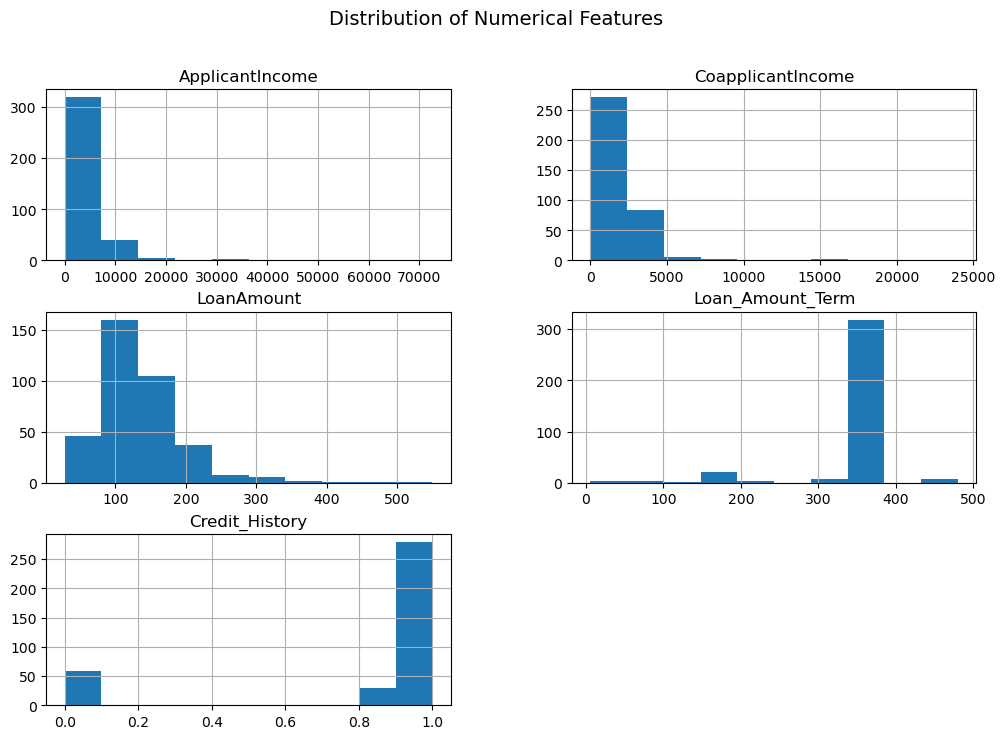

In [11]:
# Histograms help us understand the spread and frequency of values
data[num_cols].hist(figsize=(12,8))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# Boxplot - Detecting Outliers

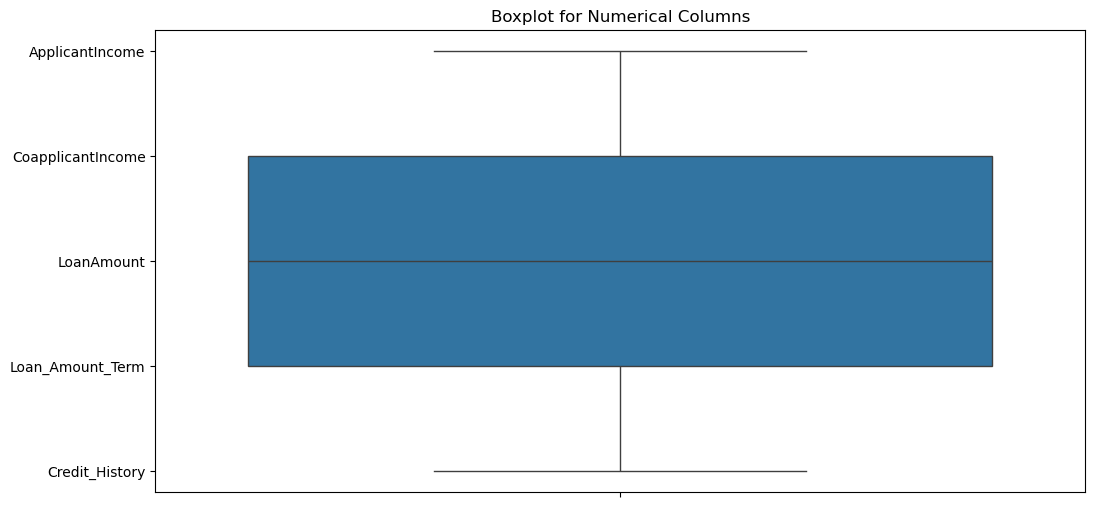

In [12]:
# Boxplots show median, quartiles, and extreme values (outliers)
plt.figure(figsize=(12,6))
sns.boxplot(data=num_cols)
plt.title("Boxplot for Numerical Columns")
plt.show()

# Bar Charts - Frequency of Categorical Values

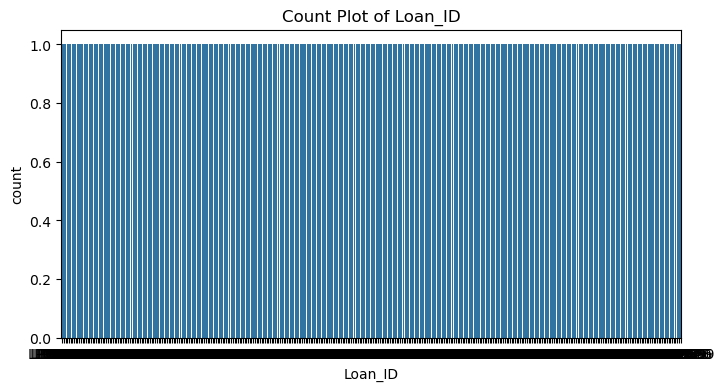

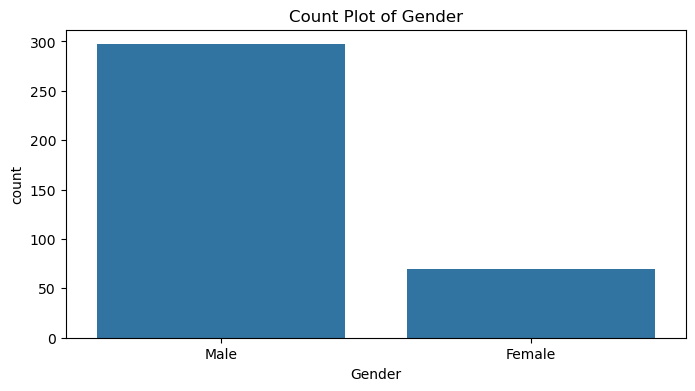

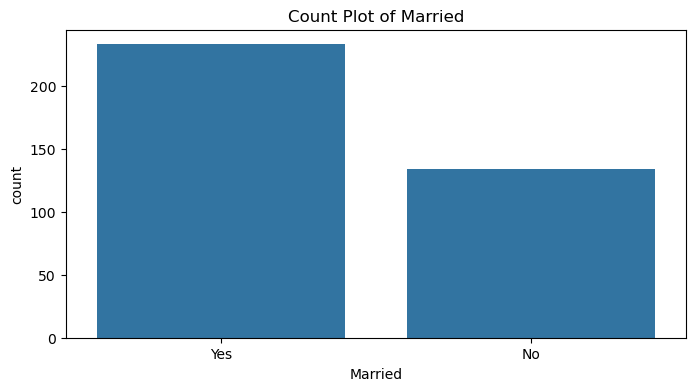

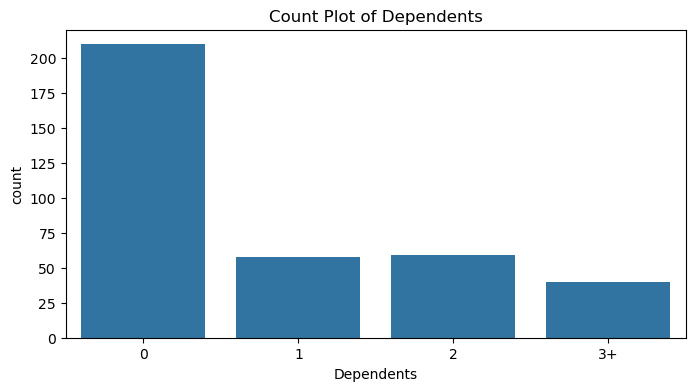

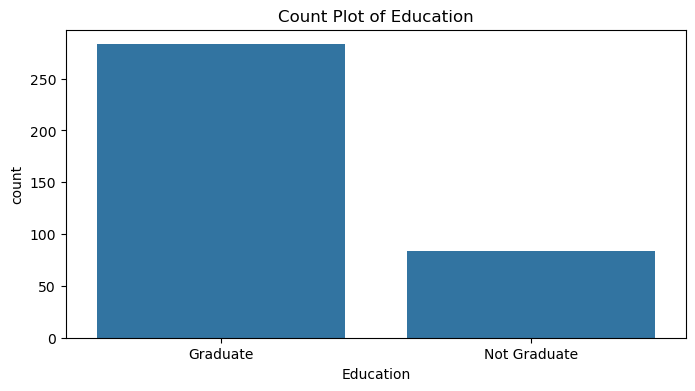

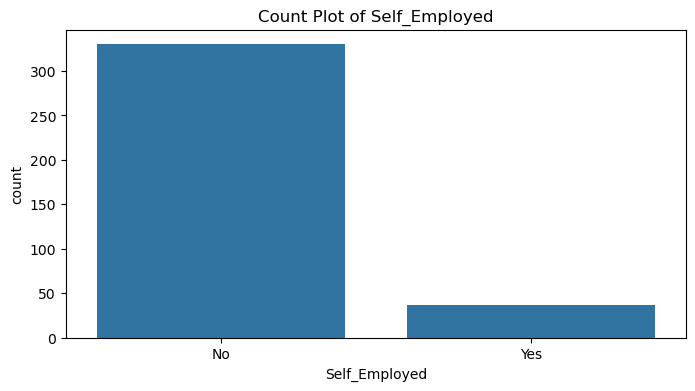

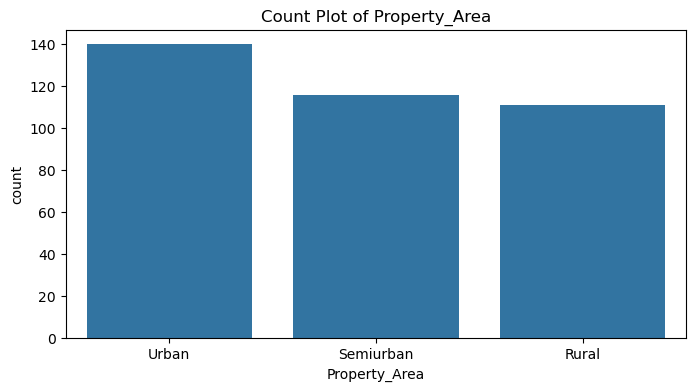

In [13]:
# Count plots show how many times each category appears
for col in cat_cols:
    plt.figure(figsize=(8,4)) 
    sns.countplot(x=data[col]) 
    plt.title(f"Count Plot of {col}") 
    plt.show()

# Pie Chart

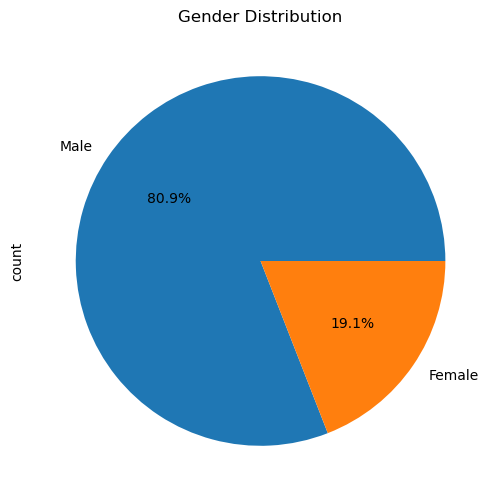

In [15]:
# Pie chart shows percentage share of categories
if 'Gender' in data.columns: 
    data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
    plt.title("Gender Distribution")
    plt.show()

# Bivariate Analysis (Comparing Two Variables)
## Scatter Plot - Relationship Between Income and Loan Amount

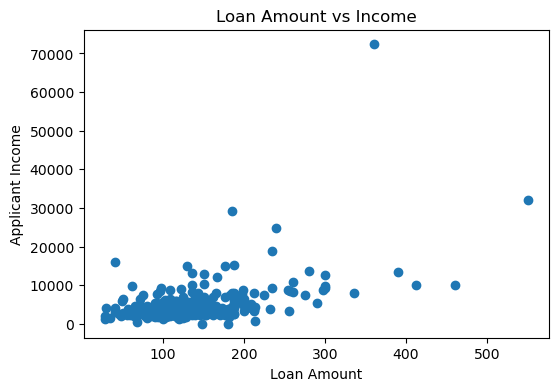

In [16]:
if 'LoanAmount' in data.columns and 'ApplicantIncome' in data.columns: 
    plt.figure(figsize=(6,4))
    plt.scatter(data['LoanAmount'], data['ApplicantIncome']) 
    plt.xlabel("Loan Amount")
    plt.ylabel("Applicant Income") 
    plt.title("Loan Amount vs Income") 
    plt.show()

# Boxplot - Effect of Categorical Feature on Loan Amount

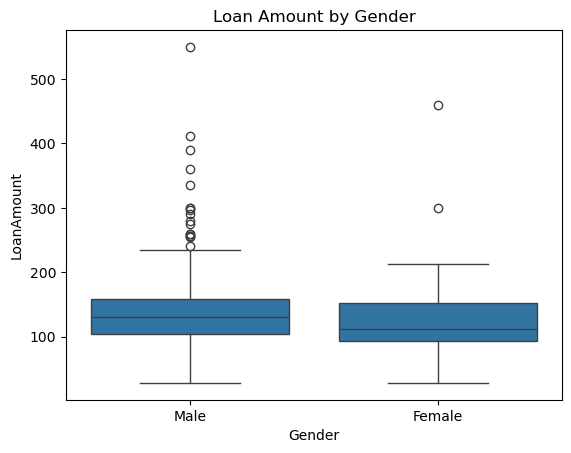

In [17]:
if 'Gender' in data.columns and 'LoanAmount' in data.columns: 
    sns.boxplot(x='Gender', y='LoanAmount', data=data)
    plt.title("Loan Amount by Gender") 
    plt.show()

# Multivariate Analysis (More than Two Variables)
## Correlation Heatmap - Check Relationship Strength

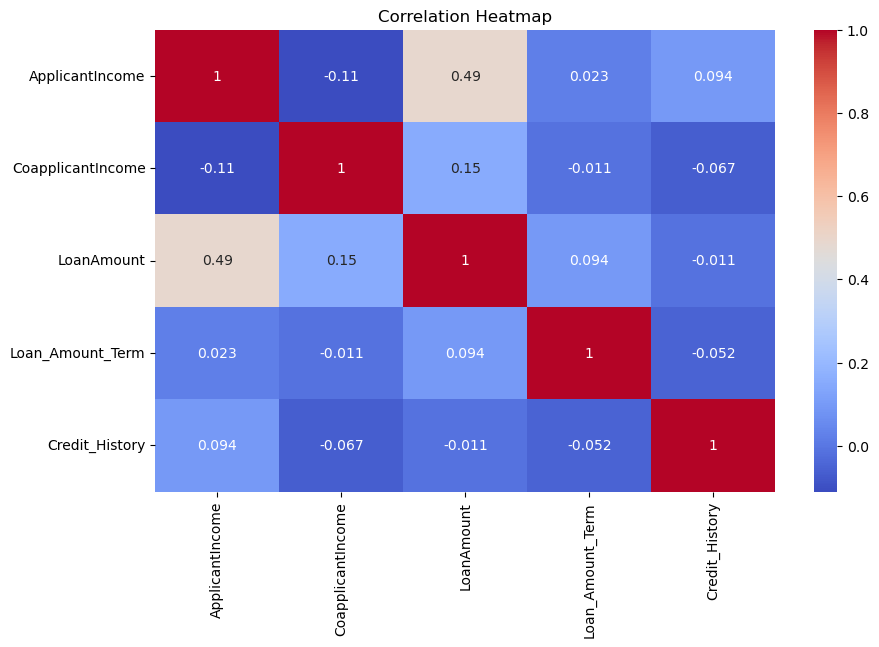

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Stacked Bar Chart - Loan Status by Gender

In [19]:
if 'Loan_Status' in data.columns and 'Gender' in data.columns: 
    pd.crosstab(data['Gender'], data['Loan_Status']).plot(kind='bar', stacked=True) 
    plt.title("Loan Status by Gender") 
    plt.ylabel("Count") 
    plt.show()

## Conclusion

- The dataset was successfully cleaned by handling missing values in both numeric and categorical features.
- **Applicant Income** and **Loan Amount** showed a moderate positive correlation (~0.49).
- **Credit History** emerged as a crucial factor, with most applicants having a history value of 1 (good credit).
- Categorical analysis revealed:
  - Majority of applicants were **Male**, **Married**, and **Graduates**.
  - Most properties were located in **Urban areas**.
- Visualizations highlighted:
  - Income distribution is highly skewed with some extreme outliers.
  - Loan amounts are generally concentrated between 100–200 units.
  - Gender and education slightly influence loan amounts, but **Credit History** is the strongest predictor.
- Overall, the analysis provides insights into applicant demographics, financial background, and loan approval trends, forming a solid foundation for building predictive models in future steps.